# Aprendizaje automático

## Support Vector Machines
### Clasificación de especies de Iris

Hemos recogido muestras de Iris en base al tamaño de sus pétalos y sépalos
- Largo y ancho del pétalo en cm
- Largo y ancho del sépalo en cm

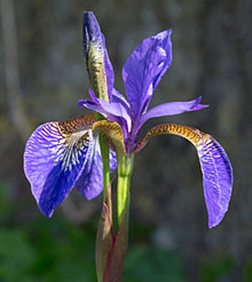

Ya tenemos clasificados unos datos recogidos previamente de un experto en el que ha clasificado tres especies: _Setosa, versicolor o virginica_

**Objetivo**

Construir un modelo de aprendizaje automático que aprenda de estos datos previos conocidos y podamos predecir la especie de los datos recogidos por nosotros.


#### Identificación del problema

Tenemos un problema de **aprendizaje supervisado**
- _Porque ya tenemos valores de las especies correctas._

Es un problema de clasificación.
- Cada una de las flores va a pertenecer a una de las tres posibles clases
- Las posibles salidas se denominan clases.

**Para unos datos de entrada la salida deseada es la especie a la que pertenece**


#### Primer paso: Exploración del dataset

In [1]:
# cargamos el conjunto de datos
from sklearn.datasets import load_iris

Asignamos el dataset en un objeto, es similar a un diccionario contiene keys y values

In [2]:
iris_dataset = load_iris()

In [3]:
print("Claves para el dataset:\n", iris_dataset.keys())

Claves para el dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


DESCR es una descripción del dataset.

In [4]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- `target_names` es un array de `String` que contiene las especies que queremos predecir.
- `features_names` es una lista de `String` que da una descripción de cada característica.

In [5]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


Los datos están contenidos en los campos target y data.
data contiene un NumPy array con la longitud de pétalo y sépalo. Las filas se corresponden con cada flor encontrada y las columnas con los valores

In [6]:
print("Tipo de los Datos:", type(iris_dataset['data']))

Tipo de los Datos: <class 'numpy.ndarray'>


In [7]:
print("Forma de los datos:", iris_dataset['data'].shape)

Forma de los datos: (150, 4)


In [8]:
print("Primeras filas de datos: ", iris_dataset['data'][:5])

Primeras filas de datos:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


target es un NumPy array que contiene las especies conocidas de cada flor, están codificadas con valores 0 a 2

In [9]:
print("Datos conocidos: ", iris_dataset['target'])

Datos conocidos:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
print("Valores de especies: ", iris_dataset['target_names'])

Valores de especies:  ['setosa' 'versicolor' 'virginica']


**Es un ejemplo y no vamos a hacer un EDA exhaustivo, pero sería lo que habría que hacer**

**Queremos clasificar las especias usando SVM**

Vamos a observar los datos para analizar si serían linealmente separables (en apariencia).

In [42]:
import pandas as pd
import numpy as np

data1 = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])

In [12]:
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


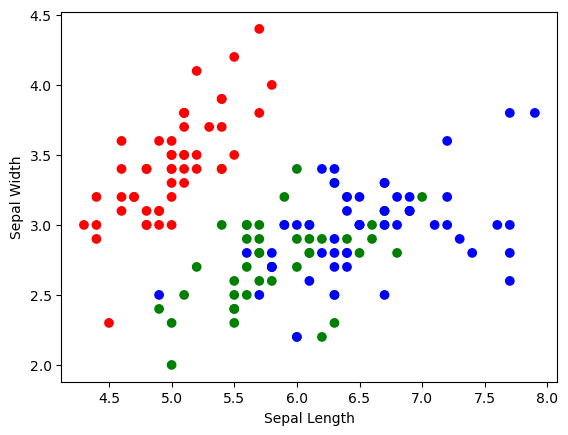

In [13]:
import matplotlib.pyplot as plt
import matplotlib

# Sepal length vs Sepal Width (Setosa vs Versicolor)
colors = ['red','green','blue']
label = data1['target']


plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.scatter(data1['sepal length (cm)'], data1['sepal width (cm)'], c=label, cmap=matplotlib.colors.ListedColormap(colors))


In [14]:
data1 = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])
data1 = data1.loc[(data1['target'] ==1) | (data1['target'] ==2)]

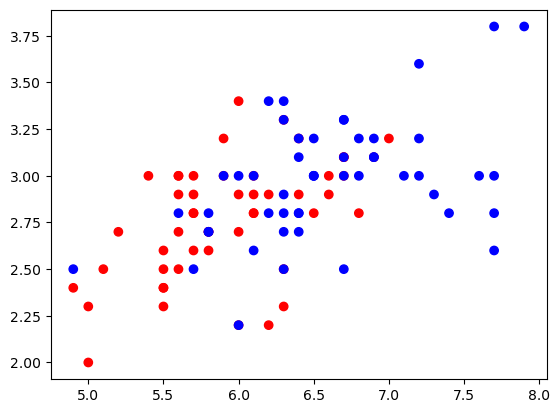

In [15]:
label = data1['target']

plt.scatter(data1['sepal length (cm)'], data1['sepal width (cm)'], c=label, cmap=matplotlib.colors.ListedColormap(colors))


#### Datos de entrenamiento y de test

Necesitamos evaluar el éxito de nuestro modelo para poderlo aplicar a futuros casos

No podemos utilizar los mismos datos para construir el modelo que para validarlo

Necesitamos nuevos datos que el modelo nunca haya visto pero para los que nosotros sí sabemos el resultado

_hold-out_: Particionamos el dataset inicial en datos de entrenamiento y en datos de test (75-25%)
scikit-learn contiene una función que mezcla el dataset y lo particiona


Habitualmente las particiones se llaman entrenamiento y pruebas

In [43]:
from sklearn.model_selection import train_test_split

X = data1.drop(columns = ['target']).copy()
y = data1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [44]:
X_train, X_test, y_train, y_test

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 61                 5.9               3.0                4.2               1.5
 92                 5.8               2.6                4.0               1.2
 112                6.8               3.0                5.5               2.1
 2                  4.7               3.2                1.3               0.2
 141                6.9               3.1                5.1               2.3
 ..                 ...               ...                ...               ...
 9                  4.9               3.1                1.5               0.1
 103                6.3               2.9                5.6               1.8
 67                 5.8               2.7                4.1               1.0
 117                7.7               3.8                6.7               2.2
 47                 4.6               3.2                1.4               0.2
 
 [112 rows x 4 columns],
      sepal length (cm)  

In [18]:
from sklearn.svm import SVC

# defatul: C=1, gamma=scale, kernel=rbf
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.92

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))


[[11  2]
 [ 0 12]]
              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [20]:
# C = 10^-5--10^5
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
pred = model_C.predict(X_test)
print(confusion_matrix(y_test,pred))
#model_C.score(X_test, y_test)
print(classification_report(y_test, pred))

[[11  2]
 [ 0 12]]
              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [21]:
# 2. Gamma

model_g = SVC(gamma=0.1)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.92

In [22]:
pred = model_g.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[11  2]
 [ 0 12]]
              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [23]:
# 3. Kernel

model_linear_kernal = SVC(C=100000, kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.92

In [24]:
pred = model_linear_kernal.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[11  2]
 [ 0 12]]
              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [25]:
# valores default de SVC
# f gamma='scale': 1 / (n_features * X.var())
model_all = SVC(C=10000, kernel='rbf', gamma='auto')
model_all.fit(X_train, y_train)
model_all.score(X_test, y_test)

0.92

In [26]:
pred = model_all.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[11  2]
 [ 0 12]]
              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



## Redes neuronales

Ahora, vamos a ver cómo implementar un clasificador de especies de iris haciendo uso de las redes neuronales.

### Qué es una red neuronal

Las redes neuronales son uno de los métodos o metodologías de modelización predictiva más extendidas, estudiadas y que mejores resultados permiten obtener. No podemos olvidar a Geoffrey Hinton al que se conoce como uno de los padres del Deep Learning.

> [Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1985). Learning internal representations by error propagation (No. ICS-8506). California Univ San Diego La Jolla Inst for Cognitive Science.](https://apps.dtic.mil/sti/pdfs/ADA164453.pdf)

En la siguiente imagen, podemos observar cómo se representa una neurona.
![Esquema neurona](neurona.png)
Consta de unas entradas, cuya información se procesará en el nodo, y se genera una salida.

Normalmente en las neuronas además del valor de entrada, el peso para cada una, hay un bias. El bias es un tipo especial de peso, no está asociado a un valor de entrada. El bias lo que hace es permitir modificar el valor de la salida independientemente de las entradas.

En la neurona se aplica una función de activación a los valores de entrada para producir la salida.
y (salida)  = w (peso) * x (valor) + b (bias)

Esta fórmula nos puede resultar familiar porque ya la hemos visto antes, es la función de una recta.

### Nuestro primer modelo lineal

Podemos empezar a definir nuestra red neuronal como un modelo lineal en el que habrá una única neurona.

Usando sklearn esto lo haremos con la clase MLPClassifier que crea una red neuronal. Este modelo será similar a una regresión lineal, pero es útil para saber cómo funciona.

### Elementos involucrados en una red neuronal
* Neurona
* Función de activación
* Propagación hacia delante
* Cálculo del error
* Propagación hacia atrás

### Implementación de la red neuronal
Vamos a realizar la implementación de una red neuronal para un clasificador binario.

Necesitamos una función de activación para nuestras neuronas (Función escalón, Función sigmoide, Función rectificadora, Función tangente hiperbólica). En este caso optamos por la función rectificadora ya que parece buena decicisón para una clasificación multiclase.

El siguiente paso es definir la arquitectura de la red neuronal, número de capas. En este caso optamos por tres capas: entrada - oculta - salida.

Cada neurona necesita unos parámetros: pesos (y bias). En la capa de entrada no hay pesos, estos aplican a la capa oculta y a la capa de salida. Recordemos que el objetivo del entrenamiento de la red neuronal es calcular el valor de los pesos, gracias a que propaga el error hacia atrás para ajustar la predicción.

Finalmente, una vez que tenemos las salidas tenemos que calcular el error de la red.
Se puede calcular el error de varias maneras, [Cálculo del error](https://en.wikipedia.org/wiki/Backpropagation#Loss_function) [Vídeo sobre métricas comunes](https://www.youtube.com/watch?v=wmQX1t2PHJc)

Veamos ahora cómo se hace esto con sklearn
from sklearn.neural_network import MLPClassifier

In [51]:
from sklearn.neural_network import MLPClassifier
neural_classifier1 = MLPClassifier(activation = 'relu', hidden_layer_sizes=(20), solver='adam', alpha = 0.0001,
                                   learning_rate = 'constant', learning_rate_init = 0.001,
                                   verbose = True, early_stopping = False, beta_1 = 0.9,
                                   beta_2 = 0.999, epsilon = 1e-8,random_state=1, max_iter=1000).fit(X_train, y_train)



Iteration 1, loss = 1.41638596
Iteration 2, loss = 1.38715257
Iteration 3, loss = 1.35841522
Iteration 4, loss = 1.33017244
Iteration 5, loss = 1.30244031
Iteration 6, loss = 1.27528338
Iteration 7, loss = 1.24875010
Iteration 8, loss = 1.22283971
Iteration 9, loss = 1.19756772
Iteration 10, loss = 1.17293344
Iteration 11, loss = 1.14896664
Iteration 12, loss = 1.12568438
Iteration 13, loss = 1.10312767
Iteration 14, loss = 1.08128806
Iteration 15, loss = 1.06017640
Iteration 16, loss = 1.03977222
Iteration 17, loss = 1.02011002
Iteration 18, loss = 1.00117336
Iteration 19, loss = 0.98298911
Iteration 20, loss = 0.96553610
Iteration 21, loss = 0.94881546
Iteration 22, loss = 0.93281863
Iteration 23, loss = 0.91750761
Iteration 24, loss = 0.90294121
Iteration 25, loss = 0.88910273
Iteration 26, loss = 0.87596159
Iteration 27, loss = 0.86348361
Iteration 28, loss = 0.85166792
Iteration 29, loss = 0.84054324
Iteration 30, loss = 0.83003397
Iteration 31, loss = 0.82017185
Iteration 32, los

Iteration 491, loss = 0.25871663
Iteration 492, loss = 0.25819341
Iteration 493, loss = 0.25767058
Iteration 494, loss = 0.25714813
Iteration 495, loss = 0.25662697
Iteration 496, loss = 0.25610653
Iteration 497, loss = 0.25558689
Iteration 498, loss = 0.25506797
Iteration 499, loss = 0.25454989
Iteration 500, loss = 0.25403247
Iteration 501, loss = 0.25351597
Iteration 502, loss = 0.25300026
Iteration 503, loss = 0.25248543
Iteration 504, loss = 0.25197129
Iteration 505, loss = 0.25145799
Iteration 506, loss = 0.25094540
Iteration 507, loss = 0.25043365
Iteration 508, loss = 0.24992285
Iteration 509, loss = 0.24941286
Iteration 510, loss = 0.24890379
Iteration 511, loss = 0.24839551
Iteration 512, loss = 0.24788814
Iteration 513, loss = 0.24738182
Iteration 514, loss = 0.24687630
Iteration 515, loss = 0.24637153
Iteration 516, loss = 0.24586764
Iteration 517, loss = 0.24536453
Iteration 518, loss = 0.24486265
Iteration 519, loss = 0.24436117
Iteration 520, loss = 0.24386048
Iteration 

Iteration 924, loss = 0.11341303
Iteration 925, loss = 0.11324054
Iteration 926, loss = 0.11306828
Iteration 927, loss = 0.11289644
Iteration 928, loss = 0.11272489
Iteration 929, loss = 0.11255365
Iteration 930, loss = 0.11238282
Iteration 931, loss = 0.11221253
Iteration 932, loss = 0.11204275
Iteration 933, loss = 0.11187344
Iteration 934, loss = 0.11170454
Iteration 935, loss = 0.11153605
Iteration 936, loss = 0.11136808
Iteration 937, loss = 0.11120070
Iteration 938, loss = 0.11103397
Iteration 939, loss = 0.11086774
Iteration 940, loss = 0.11070171
Iteration 941, loss = 0.11053596
Iteration 942, loss = 0.11037059
Iteration 943, loss = 0.11020561
Iteration 944, loss = 0.11004114
Iteration 945, loss = 0.10987755
Iteration 946, loss = 0.10971438
Iteration 947, loss = 0.10955170
Iteration 948, loss = 0.10938949
Iteration 949, loss = 0.10922770
Iteration 950, loss = 0.10906648
Iteration 951, loss = 0.10890568
Iteration 952, loss = 0.10874528
Iteration 953, loss = 0.10858532
Iteration 

C:\Users\amasdfamily\Anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
neural1_y_predict = neural_classifier1.predict(X_test)

In [53]:
from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

# Precisión y matriz de confusión sobre el modelo, utilizando sólo 1 de los folds:
print("Precisión:",metrics.accuracy_score(y_test, neural1_y_predict))

#Confusion Matrix:
pd.crosstab(y_test, neural1_y_predict, rownames=["Real"], colnames=["Predicho"])

Precisión: 0.9736842105263158


Predicho,0.0,1.0,2.0
Real,,,
0.0,13,0,0
1.0,0,15,1
2.0,0,0,9


In [30]:
neural_classifier1.coefs_

[array([[-0.05745616,  0.13148238, -0.28331186, -0.12383165, -0.21408817,
         -0.22555645, -0.19090958, -0.07984947, -0.04978231,  0.03219713,
         -0.05260992,  0.09717573, -0.16898562,  0.2278997 , -0.28182934,
          0.10305503, -0.03830166,  0.04366049, -0.1977623 , -0.18404698],
        [ 0.16437354,  0.26882063, -0.10997288,  0.10140141,  0.20718035,
          0.2375467 , -0.24930552, -0.25772394, -0.18087548,  0.22804371,
         -0.23308348, -0.05523625,  0.25513291,  0.02858712,  0.1026081 ,
         -0.11147942,  0.11681778,  0.20289358, -0.26831344,  0.13474273],
        [ 0.27241417,  0.15300196, -0.11706009,  0.15719406, -0.23534008,
         -0.02015522,  0.22605657, -0.10932639, -0.11260205, -0.20371748,
         -0.28701801,  0.09337636, -0.15688872, -0.12556142, -0.01451219,
         -0.24820051,  0.05255514, -0.19407142,  0.06151047,  0.10547835],
        [-0.23948317, -0.03968321,  0.12210066, -0.05940906, -0.25092225,
          0.03068965,  0.08469077, 

## Algoritmo de backpropagation

Las redes neuronales no se programan, se entrenan.

Necesitamos encontrar el ajuste de pesos que proporciona buenos resultados para la red.

La forma más habitual es el algoritmo backpropagation o de propagación inversa del gradiente.
_Lecture from the course Neural Networks for Machine Learning, as taught by Geoffrey Hinton (University of Toronto) on Coursera in 2012. https://www.youtube.com/watch?v=LOc_y67AzCA_


El algoritmo itera en ciclos, llamados _epochs_, utilizando dos fases en cada ciclo:

1. Forward: las neuronas se activan en secuencia desde la capa de entrada a la capa de salida aplicando los pesos de cada neurona y la función de activación.
2. Backward: la señal de salida de la red se compara con el valor real. El error se propaga hacia atrás en la red para modificar los pesos entre las neuronas y reducir errores futuros.

Para determinar en cuanto se deben de modificar los pesos de una red se utiliza una técnica llamada descenso del gradiente (gradient descent)*. Los pesos se modifican siguiendo la dirección que produce una mayor reducción del error, utilizando para ello la derivada de la activación de cada neurona para identificar el gradiente de la dirección de los pesos futuros.

El algoritmo intenta modificar aquellos pesos que proporcionan una mayor reducción del error utilizando un parámetro conocido como learning rate. Cuanto mayor es el learning rate más rápido el algoritmo desciende por los gradientes.

(*) **El descenso de gradiente (GD)** es un algoritmo iterativo de optimización de primer orden que se utiliza para encontrar un mínimo/máximo local de una función determinada.

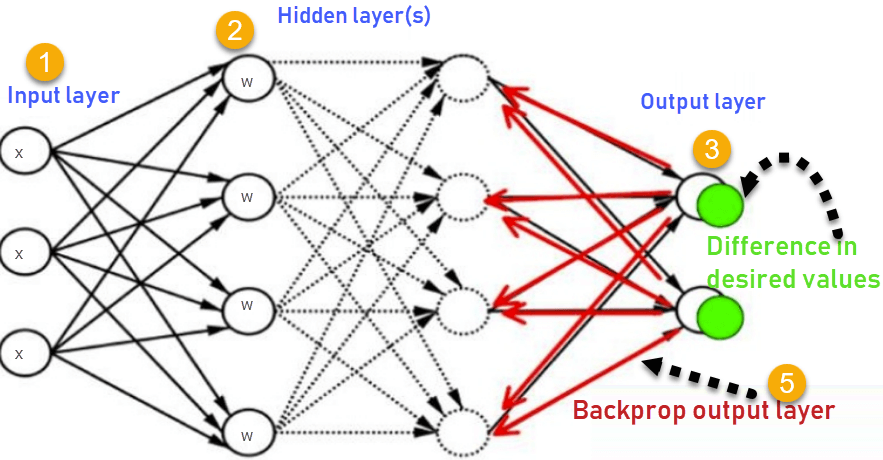

### Ejemplo de ANN

Todos los días tomamos café, zumo y tostadas en la cafetería, pero sólo al final de la semana nos pasan el total de la cuenta, sin darnos el precio individual de cada producto. Tras varias semanas, deberíamos ser capaces de adivinar esos precios individuales…

Algoritmo iterativo

- Empezar con una estimación (aleatoria) de los precios.
- Ajustar los precios estimados para que encajen con los importes facturados. 

Cada semana, el total nos impone una restricción lineal sobre los precios de las cantidades consumidas:

Total = w_cafe* x_café + w_zumo * x_zumo + w_tostada * x_tostada

- Los precios son los pesos
- Las entradas corresponden a las cantidades consumidas

El algoritmo de aprendizaje del perceptrón garantiza encontrar un conjunto de pesos que proporcione la respuesta correcta si tal conjunto existe. El perceptrón es un modelo de clasificación lineal, por lo cual será capaz de clasificar correctamente los ejemplos de entrada siempre que las clases sean linealmente separables. 

¿Cómo entrenamos estas redes multicapa?  Necesitamos un algoritmo eficiente que nos permita adaptar todos los pesos de una red multicapa, no sólo los de la capa de salida.  Aprender los pesos correspondientes a las neuronas de las capas ocultas equivale a aprender nuevas características (no presentes en el conjunto de entrenamiento), lo que resulta especialmente difícil porque nadie nos dice directamente qué es lo que deberíamos aprender en esas unidades ocultas.

En vez de fijarnos en los cambios de los pesos, nos fijaremos en los cambios de las salidas, que intentaremos acercar a las salidas deseadas (estrategia válida para problemas no convexos).

**Total = 8,50€  = objetivo (t)**

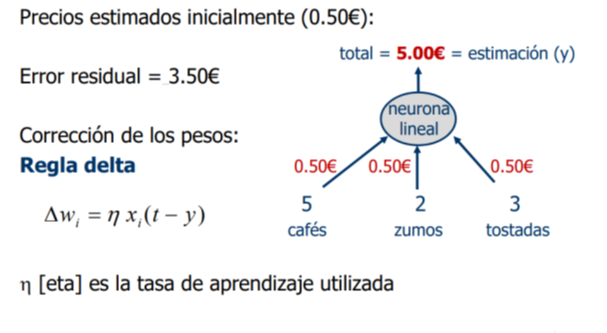
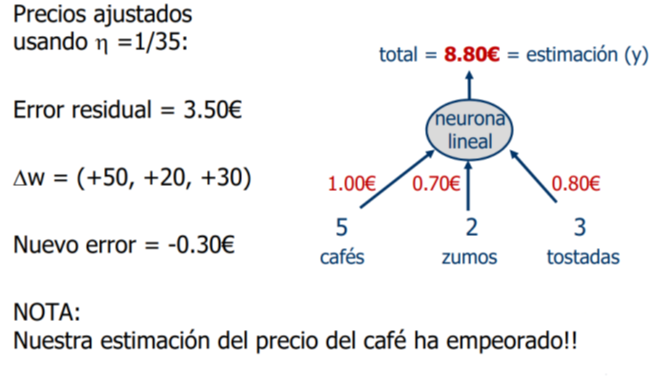

Con una tasa de aprendizaje lo suficientemente pequeña, nos iremos acercando a la mejor solución posible.

El algoritmo puede ser muy lento si existe correlación entre las variables de entrada (si siempre pedimos zumo y tostadas, será difícil determinar cómo repartir el importe y determinar el precio de esos productos).

Tenemos que elegir un valor adecuado para un parámetro del algoritmo: la tasa de aprendizaje.